In [2]:
# time: 2023.07.27
# author: bio大恐龙

import pandas as pd
film_details_df = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/films_info.csv', encoding='gbk')
film_details_df['Rating_value'] = [float(i) for i in film_details_df['Rating_value']]
film_details_df['Year'] = [str(i) for i in film_details_df['Year']]

In [13]:
film_details_df.head()

,Film_name,URL,Year,Director,Actors,Genre,Rating_count,Rating_value,IMDb,Description,Interesting_count,Watched_count,Level
0,超能一家人,https://movie.douban.com/subject/35228789/,2023,宋阳,"'艾伦', '沈腾', '陶慧', '张琪', '韩彦博', '白丽娜', '康晞娅', '...","'喜剧', '家庭', '奇幻'",52844,4.0,tt12787014,郑前（艾伦 饰）新开发的APP被狡猾又诚实的反派乞乞科夫（沈腾 饰）盯上了。幸好郑前一家人意...,54367.0,36868.0,One
1,满江红,https://movie.douban.com/subject/35766491/,2023,张艺谋,"'沈腾', '易烊千玺', '张译', '雷佳音', '岳云鹏', '王佳怡', '潘斌龙'...","'剧情', '喜剧', '悬疑', '古装'",993333,7.0,tt21148018,南宋绍兴年间，岳飞死后四年，秦桧率兵与金国会谈。会谈前夜，金国使者死在宰相驻地，所携密信也不...,1085283.0,71428.0,Four
2,独行月球,https://movie.douban.com/subject/35183042/,2022,张吃鱼,"'沈腾', '马丽', '常远', '李诚儒', '黄才伦', '李嘉琦', '郝瀚', '...","'喜剧', '科幻'",677450,6.6,tt14557302,人类为抵御小行星的撞击，拯救地球，在月球部署了月盾计划。陨石提前来袭，全员紧急撤离时，维修工...,815477.0,40755.0,Three
3,四海,https://movie.douban.com/subject/35337517/,2022,韩寒,"'刘昊然', '刘浩存', '沈腾', '尹正', '乔杉', '周奇', '张宥浩', '...","'喜剧', '动作', '爱情'",250478,5.3,tt14509614,在码头做摩托车特技表演顺便拉客的年轻人吴仁耀（刘昊然 饰），他多年不见的浪荡父亲吴仁腾（沈腾...,NaN,NaN,Two
4,我和我的父辈,https://movie.douban.com/subject/35294995/,2021,吴京,"'吴京', '章子怡', '徐峥', '沈腾', '吴磊', '黄轩', '袁近辉', '任...",'剧情',265552,6.5,tt15465312,继2019年《我和我的祖国》、2020年《我和我的家乡》，国庆三部曲之《我和我的父辈》接棒定...,NaN,NaN,Three


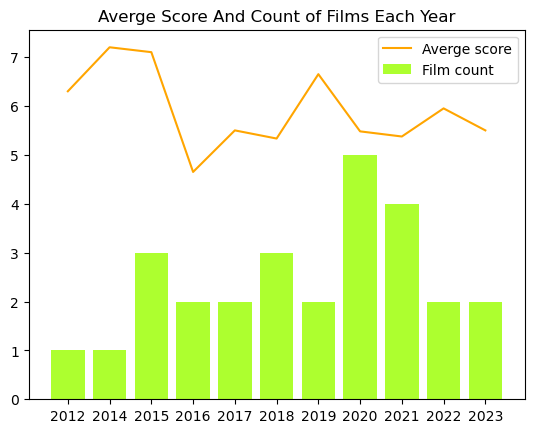

In [3]:
import matplotlib.pyplot as plt

year_analysis = film_details_df.groupby('Year').agg({'Rating_value':'mean', 'Film_name':'count'})

plt.bar(year_analysis.index, year_analysis['Film_name'], label='Film count', color='greenyellow')
plt.plot(year_analysis.index, year_analysis['Rating_value'], label='Averge score', color='orange')
# add legend
plt.legend()
# add title
plt.title('Averge Score And Count of Films Each Year')
# plt.savefig('/mnt/c/Users/ouyangkang/Desktop/film/analysis_fig/count_average_score.png')

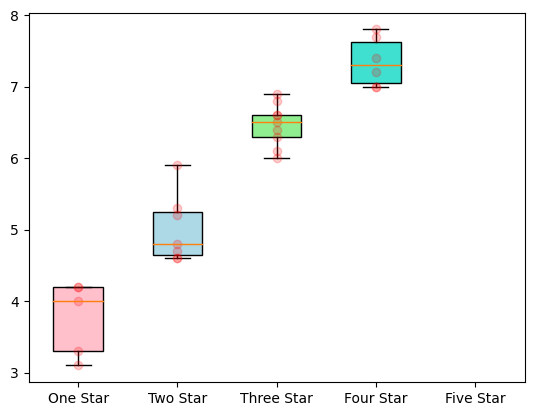

In [4]:
'''
五星档 8.5~10分
四星档 7~8.5分
三星档 6~7分
二星档 4.5~6分
一星档 2~4.5分
'''
def level_assignment(score):
    if score >= 8.5:
        return 'Five'
    elif score >= 7:
        return 'Four'
    elif score >= 6:
        return 'Three'
    elif score >= 4.5:
        return 'Two'
    else:
        return 'One'
film_details_df['Level'] = list(map(level_assignment, film_details_df['Rating_value'].tolist()))

# draw box figure
level_analysis = [film_details_df[film_details_df['Level'] == level]['Rating_value'].tolist() for level in ["One", "Two", "Three", "Four", "Five"]]

labels = ["One Star", "Two Star", "Three Star", "Four Star", "Five Star"]
colors = ['pink', 'lightblue', 'lightgreen', 'turquoise', 'mediumslateblue']

bplot = plt.boxplot(level_analysis, labels=labels, patch_artist=True, vert=True)

# fill color
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# add dots to box
for num, level in enumerate(["One", "Two", "Three", "Four", "Five"]):
    plt.plot([num + 1]*len(film_details_df[film_details_df['Level'] == level]['Rating_value'].tolist()), film_details_df[film_details_df['Level'] == level]['Rating_value'].tolist(), 'ro', alpha=0.2)
    
# plt.savefig('/mnt/c/Users/ouyangkang/Desktop/film/analysis_fig/level_analysis.png')

In [14]:
# data pre-procession
fit_data = film_details_df[['Rating_count', 'Rating_value', 'Interesting_count', 'Watched_count']]
fit_data['Rating_count'] = list(map(float, fit_data['Rating_count'].tolist()))
fit_data['Interesting_count'] = list(map(float, fit_data['Interesting_count'].tolist()))
fit_data['Watched_count'] = list(map(float, fit_data['Watched_count'].tolist()))
known_data = fit_data.dropna(subset=['Interesting_count', 'Watched_count'])
unknown_data = fit_data[fit_data.isna().any(axis=1)]

/tmp/ipykernel_6971/1010002638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data['Rating_count'] = list(map(float, fit_data['Rating_count'].tolist()))
/tmp/ipykernel_6971/1010002638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fit_data['Interesting_count'] = list(map(float, fit_data['Interesting_count'].tolist()))
/tmp/ipykernel_6971/1010002638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [15]:
known_data.head()

,Rating_count,Rating_value,Interesting_count,Watched_count
0,52844.0,4.0,54367.0,36868.0
1,993333.0,7.0,1085283.0,71428.0
2,677450.0,6.6,815477.0,40755.0
5,11566.0,4.2,20662.0,5232.0
6,27442.0,3.1,51534.0,12054.0


In [16]:
unknown_data

,Rating_count,Rating_value,Interesting_count,Watched_count
3,250478.0,5.3,NaN,NaN
4,265552.0,6.5,NaN,NaN


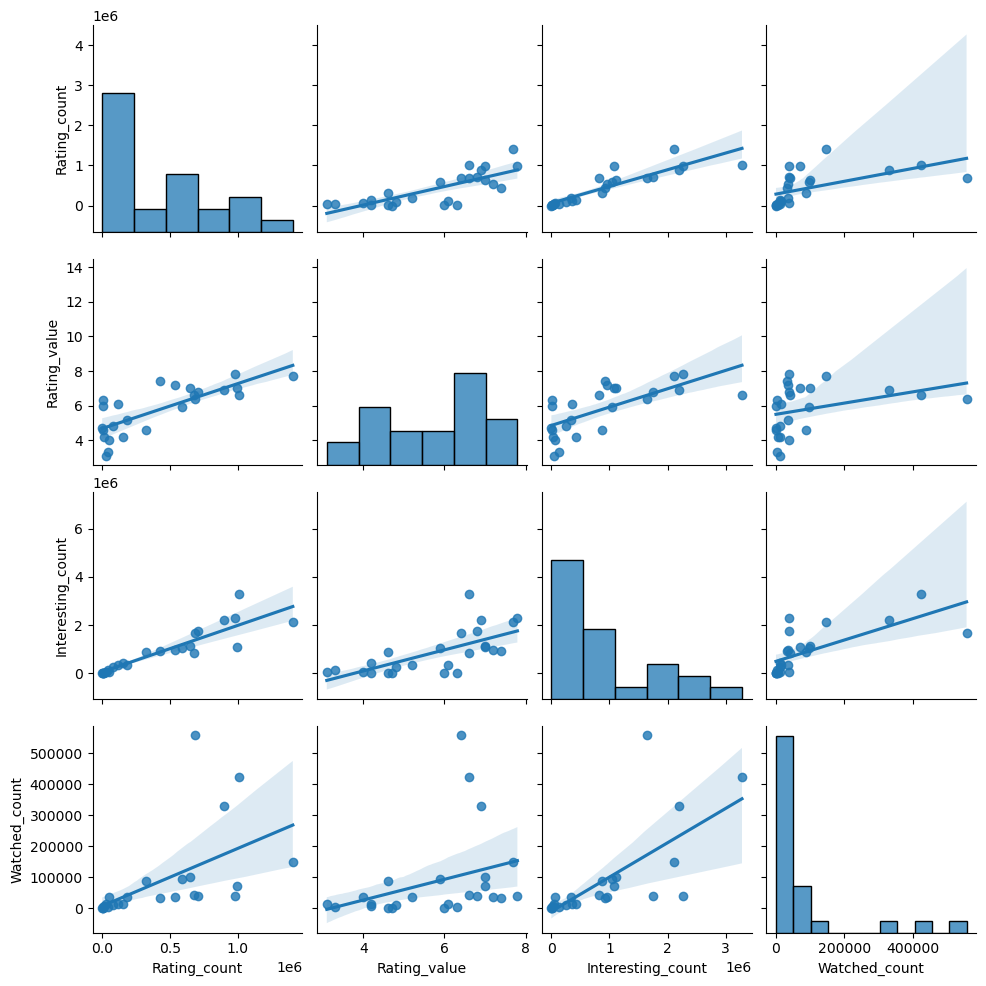

In [17]:
import seaborn as sns

# correlation analysis
sns.pairplot(known_data, kind="reg")
# plt.savefig('/mnt/c/Users/ouyangkang/Desktop/film/analysis_fig/correlation.png')

In [22]:
from sklearn import linear_model

# interesting count model
reg_interesting = linear_model.LinearRegression()
reg_interesting.fit(known_data[['Rating_count', 'Rating_value']], known_data['Interesting_count'])
# slope
print(reg_interesting.coef_)
# intercept
print(reg_interesting.intercept_)
# fill na
unknown_data['Interesting_count'] = list(reg_interesting.predict(unknown_data[['Rating_count', 'Rating_value']]))

'''
reg_watched = linear_model.LinearRegression()
reg_watched.fit(known_data[['Rating_count', 'Rating_value', 'Interesting_count']], known_data['Watched_count'])
# slope
print(reg_watched.coef_)
# intercept
print(reg_watched.intercept_)
# fill na
reg_watched.predict(unknown_data[['Rating_count', 'Rating_value', 'Interesting_count']])
'''

[ 1.98864639e+00 -2.06935340e+04]
146116.31179852784


/tmp/ipykernel_6971/3331384304.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['Interesting_count'] = list(reg_interesting.predict(unknown_data[['Rating_count', 'Rating_value']]))


"\nreg_watched = linear_model.LinearRegression()\nreg_watched.fit(known_data[['Rating_count', 'Rating_value', 'Interesting_count']], known_data['Watched_count'])\n# slope\nprint(reg_watched.coef_)\n# intercept\nprint(reg_watched.intercept_)\n# fill na\nreg_watched.predict(unknown_data[['Rating_count', 'Rating_value', 'Interesting_count']])\n"

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb_watched = GaussianNB().fit(known_data[['Rating_count', 'Rating_value', 'Interesting_count']], known_data['Watched_count'])


In [24]:
gnb_watched.predict(unknown_data[['Rating_count', 'Rating_value', 'Interesting_count']])

array([13333., 13333.])